In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración para visualizar mejor los gráficos en Jupyter
%matplotlib inline
sns.set(style="whitegrid")

# Cargamos el archivo CSV
data = pd.read_csv('C:/DATA/heart_cleveland_upload.csv')

# Revisamos las primeras filas del DataFrame
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
# Información general de las columnas y tipos de datos
data.info()

# Revisión de valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes en cada columna:\n", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
Valores faltantes en cada columna:
 Series([], dtype: int64)


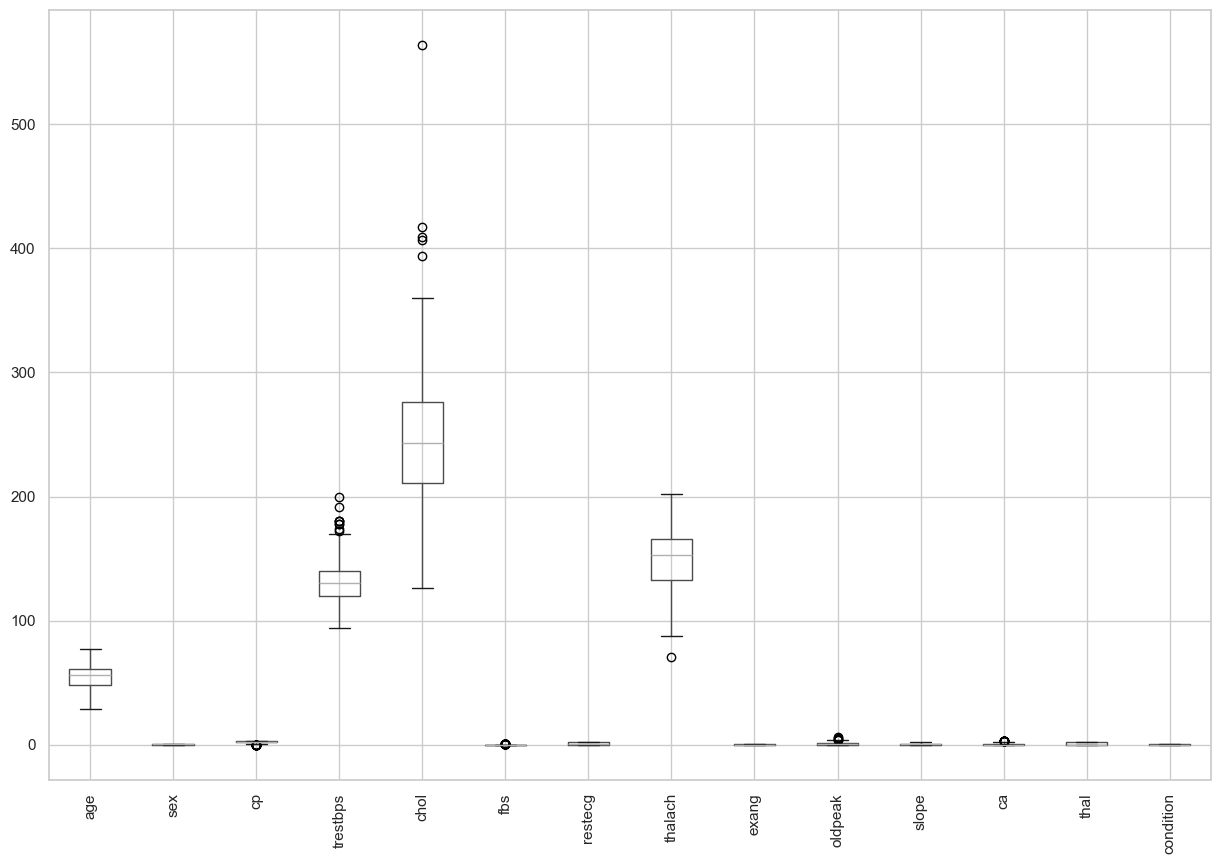

In [4]:
# Descripción estadística de las variables numéricas
data.describe()

# Boxplot de cada variable para identificar posibles outliers
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

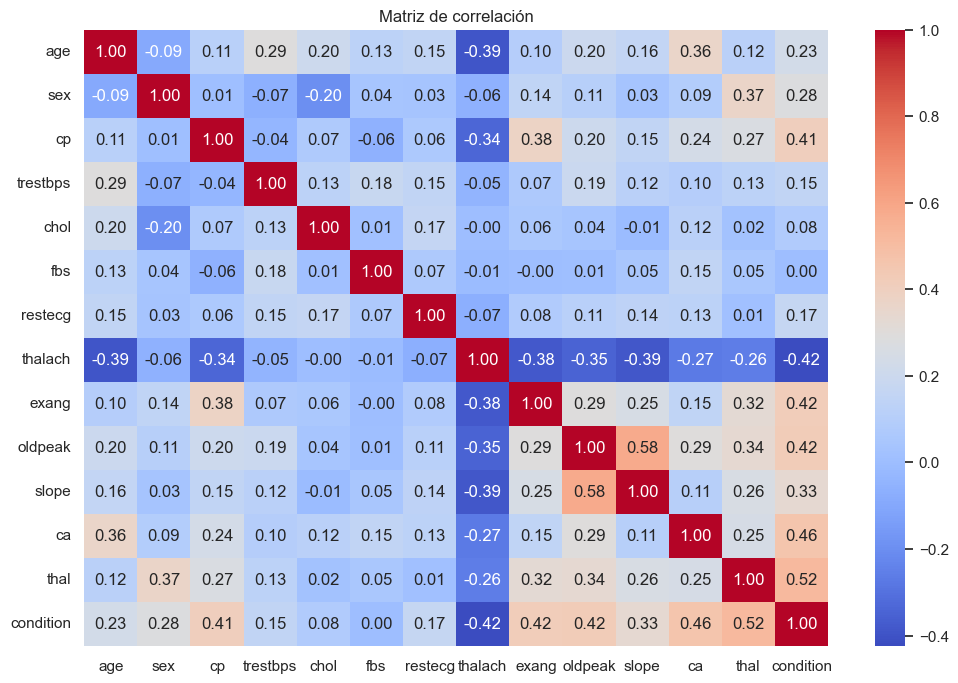

In [5]:
# Calculamos y graficamos la matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Escalamos las variables numéricas
scaler = StandardScaler()

numeric_features = ['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'sex', 'age', 'thalach']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Revisamos los primeros registros para ver los cambios
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,1,2,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292,0
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,0,0,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292,0
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,0,0,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292,0
3,1.157555,0.691095,-2.240629,0.355633,0.667499,1,2,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292,1
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,0,2,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292,0


C:\Users\SISTEMAS_PERSONERIA\AppData\Local\Temp\ipykernel_7356\750811313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


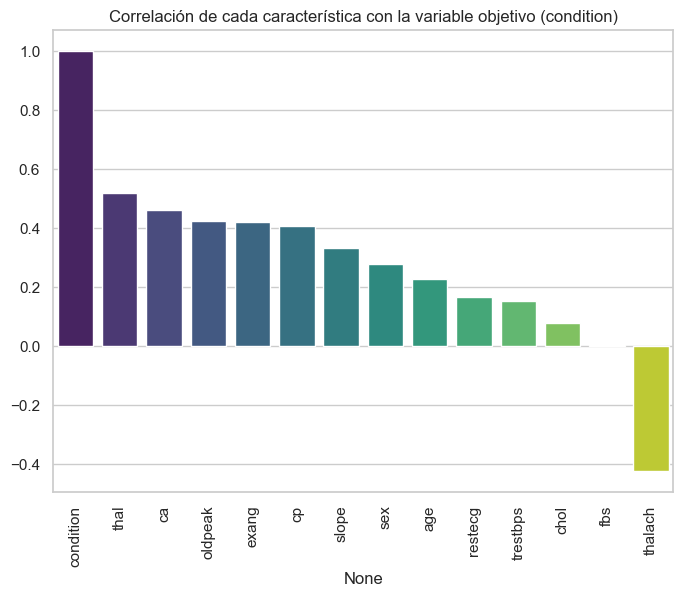

In [27]:
# Matriz de correlación centrada en la variable objetivo
plt.figure(figsize=(8, 6))
correlation_with_target = data.corr()['condition'].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Correlación de cada característica con la variable objetivo (condition)")
plt.show()


In [28]:
# Selección de características más relevantes
selected_features = ['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'sex', 'age', 'thalach']

X = data[selected_features]
y = data['condition']

# División en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos de datos
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (237, 9), Test set: (60, 9)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definimos el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Configuramos una búsqueda de hiperparámetros simple para el parámetro de regularización
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo y mostramos los mejores hiperparámetros
best_log_reg = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'C': 0.01}


Accuracy: 0.78
Precision: 0.76
Recall: 0.79
F1-score: 0.77


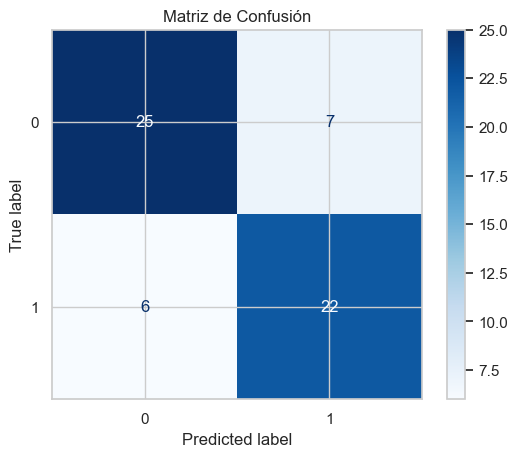

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predicciones en el conjunto de prueba
y_pred = best_log_reg.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


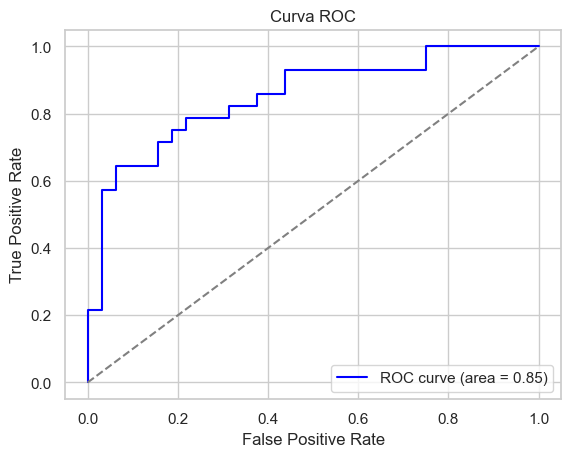

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades para la clase positiva
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


In [32]:
def predict_condition(model, scaler, input_data):
    """
    Predice la condición de enfermedad cardíaca basada en los datos de entrada de un paciente.

    Parámetros:
    - model: modelo de regresión logística entrenado
    - scaler: objeto de escalado de características
    - input_data: diccionario con las características del paciente
    
    Retorna:
    - predicción: condición predicha (0 = sin enfermedad, 1 = con enfermedad)
    - probabilidad: probabilidad de presencia de enfermedad
    """
    # Convertimos el diccionario de entrada en un DataFrame de una fila
    df_input = pd.DataFrame([input_data])
    
    # Seleccionamos solo las características necesarias para la predicción
    features = ['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'sex', 'age', 'thalach']
    
    # Asegúrate de que todas las características necesarias estén presentes
    for feature in features:
        if feature not in df_input.columns:
            df_input[feature] = 0  # O establece un valor por defecto si falta la característica
    
    # Escalamos las características
    df_input[features] = scaler.transform(df_input[features])
    
    # Realizamos la predicción
    probabilidad = model.predict_proba(df_input[features])[0][1]  # Probabilidad de clase positiva
    prediccion = model.predict(df_input[features])[0]  # Predicción binaria (0 o 1)
    
    return prediccion, probabilidad


In [33]:
# Datos de entrada de un paciente ejemplo
nuevo_paciente = {
    'thal': 2,
    'ca': 1,
    'oldpeak': 1.5,
    'exang': 1,
    'cp': 3,
    'slope': 2,
    'sex': 1,
    'age': 55,
    'thalach': 150

    
}

# Llamamos a la función de predicción
prediccion, probabilidad = predict_condition(best_log_reg, scaler, nuevo_paciente)

print("Predicción (0 = sin enfermedad, 1 = con enfermedad):", prediccion)
print("Probabilidad de enfermedad cardíaca:", probabilidad)


Predicción (0 = sin enfermedad, 1 = con enfermedad): 0
Probabilidad de enfermedad cardíaca: 1.851921769804196e-11
